## 每日投资组合价值

[https://youtu.be/UweF-2-Tr9Y](https://youtu.be/UweF-2-Tr9Y)

## 如何计算投资组合每日的总价值

[https://youtu.be/UweF-2-Tr9Y](https://youtu.be/UweF-2-Tr9Y)

![](https://guqiangjs.github.io/Study/2018/07/11/machine-learning-for-trading/1532675498707.png)

In [3]:
import pandas as pd
import quantaxis_ext
from QUANTAXIS import QA_fetch_stock_day_adv
from QUANTAXIS import QA_fetch_index_day_adv
import ploter
import talib
import numpy as np
import settings
import units
import header
import calculator as calc

#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,5]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## 投资组合假设

In [4]:
start_val = 1000000 # 初始投资总额
start_date = '2018-01-01' # 初始投资日期
end_date = '2018-12-31' # 结束投资日期
# 投资组合：贵州茅台、中国平安、招商银行、格力电器
symbols = ['600519','601318','600036','000651'] 
# 比率分配
allocs = [0.4,0.4,0.1,0.1]
zs_code='000300'#指数代码。沪深300

## 读取并计算投资组合每日收益

In [5]:
daily_return=calc.calc_daily_return(symbols,zs_code, start_date,end_date)
daily_return.head()
daily_return.describe()

,zs_000300,600519,601318,600036,000651
date,,,,,
2018-01-03,0.005869,0.017063,-0.022317,0.011816,0.011074
2018-01-04,0.004237,0.029629,0.002959,-0.010677,0.020372
2018-01-05,0.002407,0.001750,-0.004074,0.015177,0.027909
2018-01-08,0.005173,0.018649,-0.012414,-0.020930,-0.001044
2018-01-09,0.007005,0.040405,0.026568,0.010180,0.032825


,zs_000300,600519,601318,600036,000651
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,-0.001172,-0.000476,-0.000867,-0.000483,-0.000706
std,0.013489,0.022485,0.019890,0.019234,0.023067
min,-0.047992,-0.100000,-0.066097,-0.064414,-0.089674
25%,-0.008620,-0.013649,-0.012464,-0.012367,-0.013974
50%,-0.001189,-0.002131,-0.000782,-0.000700,-0.002888
75%,0.006632,0.013026,0.011751,0.011688,0.011034
max,0.043165,0.065542,0.050761,0.068696,0.100097


## 累计收益

In [12]:
daily_df=quantaxis_ext.fetch_index_stock_daily_adv(symbols,zs_code, start_date,end_date)
daily_df.head(1)
daily_df.tail(1)

,zs_000300,600519,601318,600036,000651
date,,,,,
2018-01-02,4087.4,703.85,72.59,29.62,45.15


,zs_000300,600519,601318,600036,000651
date,,,,,
2018-12-28,3010.65,590.01,56.1,25.2,35.69


In [14]:
cum_ret=(daily_df.iloc[-1]/daily_df.iloc[0])-1
cum_ret.map('{:.2%}'.format)

zs_000300    -26.34%
600519       -16.17%
601318       -22.72%
600036       -14.92%
000651       -20.95%
dtype: object

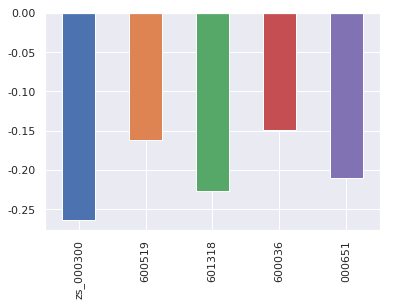

In [17]:
cum_ret.plot(kind='bar')

## 按照设定的比率计算组合剩余价值

### 收盘价归一化。所有收盘价数据从1开始计算。

In [27]:
# 移除指数列
daily_normed = daily_df.copy().drop('zs_'+zs_code, axis=1)
# 收盘价归一化
daily_normed=daily_normed/daily_normed.iloc[0]
daily_normed.head()

,600519,601318,600036,000651
date,,,,
2018-01-02,1.000000,1.000000,1.000000,1.000000
2018-01-03,1.017063,0.977683,1.011816,1.011074
2018-01-04,1.047198,0.980576,1.001013,1.031672
2018-01-05,1.049030,0.976581,1.016205,1.060465
2018-01-08,1.068594,0.964458,0.994936,1.059358


### 每日剩余价值明细

In [29]:
port_val=daily_normed*allocs*start_val
port_val.head(2)
port_val.tail(2)

,600519,601318,600036,000651
date,,,,
2018-01-02,400000.000000,400000.000000,100000.000000,100000.000000
2018-01-03,406825.317894,391073.150572,101181.634031,101107.419712


,600519,601318,600036,000651
date,,,,
2018-12-27,319954.535768,313541.810167,83896.016205,79025.470653
2018-12-28,335304.397244,309133.489461,85077.650236,79047.619048


### 每日剩余价值汇总

In [32]:
port_vals=port_val.sum(axis=1)
port_vals.head(2)
port_vals.tail(2)

date
2018-01-02    1.000000e+06
2018-01-03    1.000188e+06
dtype: float64

date
2018-12-27    796417.832793
2018-12-28    808563.155989
dtype: float64

---
投资组合 [贵州茅台、中国平安、招商银行、格力电器] 投资比率 [0.4,0.4,0.1,0.1]

比较对象 沪深300指数

比较时间：2018年全年

年度收益：

    * 沪深300指数    -26.34%
    * 贵州茅台       -16.17%
    * 中国平安       -22.72%
    * 招商银行       -14.92%
    * 格力电器       -20.95%

根据预定投资比率计算。期初资金1000000元，期末资金808563元。盈亏-19.14%。跑赢指数。